<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-herp96/blob/main/programming_challenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-23 21:27:59--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.6’

organisms.jpg.6     100%[===================>] 156.03K  --.-KB/s    in 0.03s   

2020-11-23 21:27:59 (5.62 MB/s) - ‘organisms.jpg.6’ saved [159777/159777]



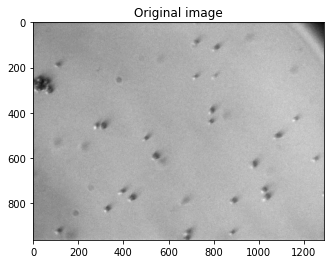

In [198]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt
import numpy as np 

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 

# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

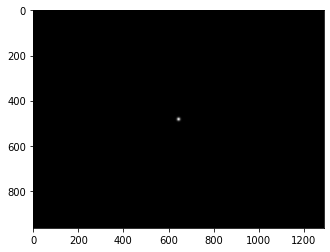

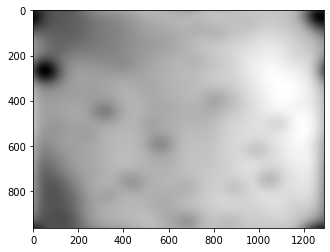

In [270]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

# deploy low-pass filter on image to remove high frequency noise 
# first do fourier transform of image then remove the freuqnecies outside of the mask  
fft_img = np.fft.fft2(img, s= None) 
shifted_fft_img = np.fft.fftshift(fft_img)
n = 2
dims = img.shape
d0 = 5
x = range(dims[1])
y = range(dims[0])
xv,yv= np.meshgrid(x,y)
duv = np.linalg.norm([xv-dims[1]/2, yv-dims[0]/2],axis = 0)
#use gaussian equation on duv 
mask_bw = np.exp(-(duv**2)/(2*d0**2))
plt.imshow(255.0*mask_bw, 'gray')
plt.show()
multiply_img_mask = mask_bw * shifted_fft_img
recon_img = np.fft.ifft2(np.fft.ifftshift(multiply_img_mask))#removes high frequency
plt.imshow(abs(recon_img), 'gray')
plt.show()

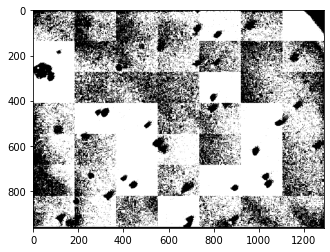

In [227]:
from matplotlib.pyplot import hist
from matplotlib.image import imread
from matplotlib.pylab import imshow 
import matplotlib.pyplot as plt
import numpy as np 
from skimage.color import rgb2gray
import cv2
from skimage.filters.thresholding import threshold_otsu


# do adaptive thresholding using otsu's method on 7x7 grid from image previous 
img = img; 
M = img.shape[0]
N = img.shape[1]
# number of grids Nx x Ny 
Nx = 7
Ny = 7
I = M // Nx
J = N//Ny 
thr = np.zeros((Nx,Ny))
img_thr = np.zeros((M,N),dtype =np.uint8)

# iterate through each grid doing otsu's thresholding 
for i in range(Nx):
  for j in range(Ny):
    sub_img = img[i*I:(i+1)*I, j*J:(j+1)*J]
    thr[i,j] = threshold_otsu(np.asarray(sub_img))
   
    img_thr[i*I:(i+1)*I, j*J:(j+1)*J] = 255*(sub_img > thr[i,j])

plt.imshow(img_thr, 'gray')
plt.show()

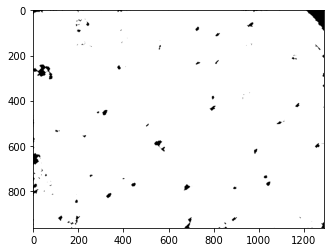

In [231]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

# utilize binary dilation to remove all the spurious pixels from prior step to just get bugs 
import scipy.ndimage as snd
import numpy as np
import cv2
a = img_thr
# Performing binary dilation for 8 iterations.
b = snd.morphology.binary_dilation(a, iterations=8)
plt.imshow(b, 'gray')

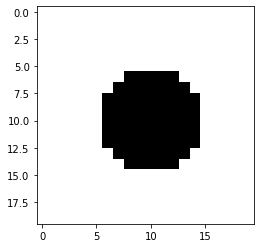

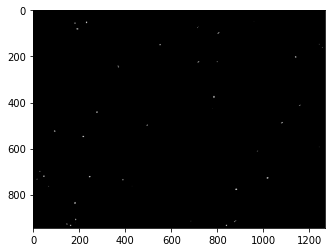

number of bugs: 42
number of pixels bugs occupy: 653
average pixel of a bug: 15.547619047619047


In [271]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels
from skimage.feature import match_template
from skimage.morphology import label
from skimage.measure import regionprops

# create a template to be used for template matching 
# circile inside a 20x20 pixel image 
dims = [20, 20]
d0 = 5
x = range(dims[1])
y = range(dims[0])
xv,yv= np.meshgrid(x,y)
temp = np.linalg.norm([xv-dims[1]/2, yv-dims[0]/2],axis = 0) < d0 
plt.imshow(255- 255*temp,'gray')
plt.show()
temp = 255-255*temp; 


# do match templating with the template created and the image from prior step 
result = match_template(b,temp)
# choose correlation threshold of 0.5 seems to work well 
thresh = 0.5

# retreive resulting objects after thresholding
res = result > thresh
c = label(res, background = 0)
reprop = regionprops(c)
plt.imshow(res, 'gray')
plt.show()

### 
print("number of bugs:", len(reprop))
print("number of pixels bugs occupy:", np.sum(res))
print("average pixel of a bug:", np.sum(res)/len(reprop))
